In [ ]:
import sys
import os
project_path = "/home/lixiangyu/multi-omics/MOMG"
sys.path.append(project_path)
from model import  DMG
from utils.cluster import clustering, mclust_R

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


cpu


In [ ]:
import scanpy as sc
adata_file='adata.h5ad'
adata=sc.read(adata_file)
print(adata)

AnnData object with n_obs × n_vars = 500 × 200
    obs: 'Ground_Truth', 'array_row', 'array_col', 'mclust', 'SpatialGlue', 'no_image', 'MISO_4', 'ATAC', 'RNA', 'MISO_4_image', 'image', 'HE'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ATAC_colors', 'Ground_Truth_colors', 'HE_colors', 'MISO_4_colors', 'MISO_4_image_colors', 'RNA_colors', 'SpatialGlue_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'image_colors', 'log1p', 'neighbors', 'no_image_colors', 'umap'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_umap', 'adj_feature', 'feat', 'spatial'
    obsp: 'connectivities', 'distances'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
dataset = "Simulation1"
input_folder = "./input/Simulation1/"
embedding_folder = "./output/"
#file get after training
file_name = "embedding"
embeddings = pd.read_csv(embedding_folder+file_name+'.csv',index_col=0)
a = pd.DataFrame(embeddings)
adata1 = clustering(a, dataset, input_folder=input_folder,model=model, n_clusters=n_cluster,method='mclust', use_pca=True, n_comps=20)
mclust_df = pd.DataFrame(adata1.obs['mclust'], index=adata1.obs_names, columns=['mclust'])
mclust_df.to_csv(input_folder+'cluster_csv/UnitedNet/'+embedding_file+'_mclust'+str(n_cluster)+'.csv')

In [ ]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/scMultiSim/"
cluster = pd.read_csv('mclust_label.csv')
adata.obs['no_image'] = cluster['mclust'].values
print(adata)

AnnData object with n_obs × n_vars = 500 × 200
    obs: 'Ground_Truth', 'array_row', 'array_col', 'mclust', 'SpatialGlue', 'no_image', 'MISO_4', 'ATAC', 'RNA', 'MISO_4_image', 'image', 'HE'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ATAC_colors', 'Ground_Truth_colors', 'HE_colors', 'MISO_4_colors', 'MISO_4_image_colors', 'RNA_colors', 'SpatialGlue_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'image_colors', 'log1p', 'neighbors', 'no_image_colors', 'umap'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_umap', 'adj_feature', 'feat', 'spatial'
    obsp: 'connectivities', 'distances'


In [2]:
import scanpy as sc
adata=sc.read(adata_file)
custom_colors = [
    
    '#8F9D27',
    '#40AE91',
    '#D6608A',
    '#E8A16D',
    '#D0D1CD',
      
    '#49A836', 
    '#957EB2',  
    '#4D5BA0',  
    '#23A9AD', 
    '#DD5D6A',
    '#E17065',
    '#669999',
]

adata.uns['Ground_Truth_colors'] = custom_colors
adata.uns['SpatialGlue_colors'] = custom_colors
adata.uns['RNA_colors'] = custom_colors
adata.uns['ATAC_colors'] = custom_colors
adata.uns['MISO_4_colors'] = custom_colors
adata.uns['no_image_colors'] = custom_colors
adata.uns['MISO_4_image_colors'] = custom_colors
adata.uns['image_colors'] = custom_colors
# adata.write(adata_file)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
adata.obs['SpatialGlue'] = adata.obs['SpatialGlue'].astype('category')
adata.obs['MISO_4'] = adata.obs['MISO_4'].astype('category')
adata.obs['no_image'] = adata.obs['no_image'].astype('category')
adata.obs['MISO_4_image'] = adata.obs['MISO_4_image'].astype('category')
adata.obs['image'] = adata.obs['image'].astype('category')
adata.obs['RNA'] = adata.obs['RNA'].astype('category')
adata.obs['ATAC'] = adata.obs['ATAC'].astype('category')
adata.obs['Ground_Truth'] = adata.obs['Ground_Truth'].astype('category')
# adata.write(adata_file)

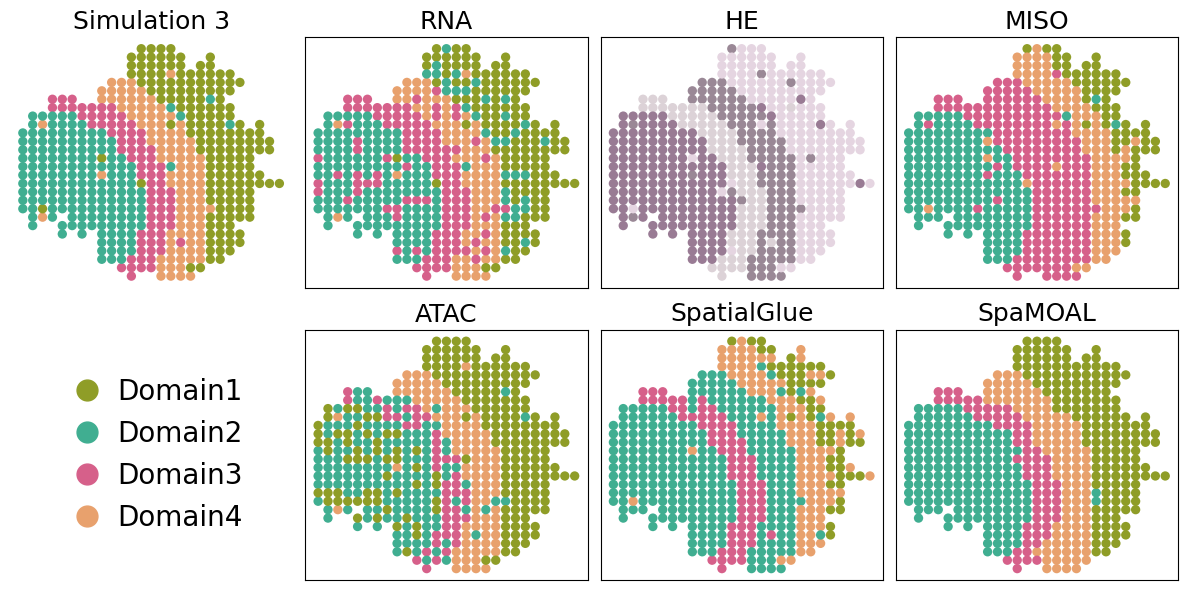

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import warnings
import matplotlib.lines as mlines
from matplotlib.lines import Line2D  # 用于创建自定义图例元素

warnings.filterwarnings('ignore')

# 假设 adata 已正确加载
# adata = sc.read(adata_file)

plt.rcParams['font.size'] = 10
fig, ax_list = plt.subplots(2, 4, figsize=(12,6))  # 扩大宽度以容纳右侧图例
s_size = 180


# 绘制子图
sc.pl.embedding(adata, basis='spatial', color='Ground_Truth', title='Simulation 3', ax=ax_list[0,0], s=s_size, show=False)

color_map= {
    '0': '#40AE91',
    '1': '#8F9D27',
    '2': '#D6608A',
    '3': '#E8A16D',
    }
sc.pl.embedding(adata, basis='spatial', color='RNA',palette=color_map, title='RNA', ax=ax_list[0,1], s=s_size, show=False)
color_map= {
    '0': '#8F9D27',
    '1': '#40AE91',
    '2': '#E8A16D',
    '3': '#D6608A',
    }
sc.pl.embedding(adata, basis='spatial', color='ATAC',palette=color_map, title='ATAC', ax=ax_list[1,1], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='HE',title='HE', ax=ax_list[0,2], s=s_size, show=False)
color_map= {
    1: '#8F9D27',
    2: '#40AE91',
    3: '#D6608A',
    4: '#E8A16D',
    }
sc.pl.embedding(adata, basis='spatial',palette=color_map, color='SpatialGlue', title='SpatialGlue', ax=ax_list[1,2], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_4_image', title='MISO', ax=ax_list[0,3], s=s_size, show=False)
color_map= {
    1: '#8F9D27',
    2: '#E8A16D',
    3: '#D6608A',
    4: '#40AE91',
    }
sc.pl.embedding(adata, basis='spatial', color='image',palette=color_map, title='SpaMOAL', ax=ax_list[1,3], s=s_size, show=False)
# 清除 ax_list[1, 3] 上的原始内容并设置为图例区域
# ax_list[1, 3].clear()

# 设置子图属性
for row in ax_list:
    for ax in row:
        ax.set_title(ax.get_title(), fontsize=18)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # 移除现有图例
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
            
        # ax.invert_yaxis()


# 自定义图例映射
custom_legend = {
        
   'Domain1' :'#8F9D27',
    'Domain2':'#40AE91',
   'Domain3' :'#D6608A',
   'Domain4' :'#E8A16D', 
}

# 创建图例句柄
legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=15,
        label=label
    )
    for label, color in custom_legend.items()
]

# 在右下角子图位置添加图例
ax_list[1, 0].legend(
    handles=legend_elements,
    loc='center',
    fontsize=20,
    frameon=False,
    ncol=1,
    handletextpad=0.1
)
ax_list[1, 0].set_frame_on(False) 
ax_list[0, 0].set_frame_on(False)  # 去除子图边框


plt.tight_layout(w_pad=0.8)  # 增加子图间距
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim4/'
plt.savefig(file_fold + 'cluster_image_1116.png', format='png', bbox_inches='tight')
plt.show()

In [19]:
import pandas as pd
# list_MISO_4_image = [2,3,0,1]
# adata.obs['MISO_4_image']  = pd.Categorical(adata.obs['MISO_4_image'], 
#                       categories=list_MISO_4_image,
#                       ordered=True)       
list_no_image = [1,4,3,2]
adata.obs['image']  = pd.Categorical(adata.obs['image'], 
                      categories=list_no_image,
                      ordered=True)        
list_RNA = [1,0,2,3]
adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
                      categories=list_RNA,
                      ordered=True)       
list_ATAC = [0,1,3,2]
adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
                      categories=list_ATAC,
                      ordered=True)    


# adata.write(adata_file)

In [21]:
import pandas as pd
import scanpy as sc
# list_RNA = [1,0,2,3]
# adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
#                       categories=list_RNA,
#                       ordered=True) 
# list_ATAC = [0,1,3,2]
# adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
#                       categories=list_ATAC,
#                       ordered=True)

list_RNA = ['1','0','2','3']
adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
                      categories=list_RNA,
                      ordered=True) 
list_ATAC = ['0','1','3','2']
adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
                      categories=list_ATAC,
                      ordered=True)                       
list_MISO_4 = [2,3,1,0]
adata.obs['MISO_4']  = pd.Categorical(adata.obs['MISO_4'], 
                      categories=list_MISO_4,
                      ordered=True)                      
list_SpatialGlue = [4,2,3,1]
adata.obs['SpatialGlue']  = pd.Categorical(adata.obs['SpatialGlue'], 
                      categories=list_SpatialGlue,
                      ordered=True)
list_no_image = [1,4,3,2]
adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
                      categories=list_no_image,
                      ordered=True)        

adata.write(adata_file)

In [11]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)


adata = sc.read(adata_file)
# 假设 adata 和 adata2 是已经加载的 AnnData 对象
#adata.obs['annotation'], _ = pd.factorize(adata.obs['ground_truth'])

true_labels = adata.obs['Ground_Truth'].values  # 获取真实标签

# 初始化一个字典来存储所有指标的结果
metrics_results = {}
predicted_labels = adata.obs[f'MISO_4_image'].values  # 获取聚类结果
    
# 计算各项指标
ami = AMI(true_labels, predicted_labels)
nmi = NMI(true_labels, predicted_labels)
ari = ARI(true_labels, predicted_labels)
homogeneity = homogeneity_score(true_labels, predicted_labels)
v_measure = v_measure_score(true_labels, predicted_labels)
mutual_info = mutual_info_score(true_labels, predicted_labels)

# 将结果存储到字典中
metrics_results[f'result'] = {
    'AMI': ami,
    'NMI': nmi,
    'ARI': ari,
    'Homogeneity': homogeneity,
    'V-measure': v_measure,
    'Mutual Information': mutual_info
}
    

# 打印或返回结果
for cluster_result, metrics in metrics_results.items():
    for metric_name, value in metrics.items():
        print(f"{value:.4f},",end=" ")
    print()  # 打印一个空行以分隔不同的聚类结果

0.7626, 0.7642, 0.6723, 0.7588, 0.7642, 1.0145, 


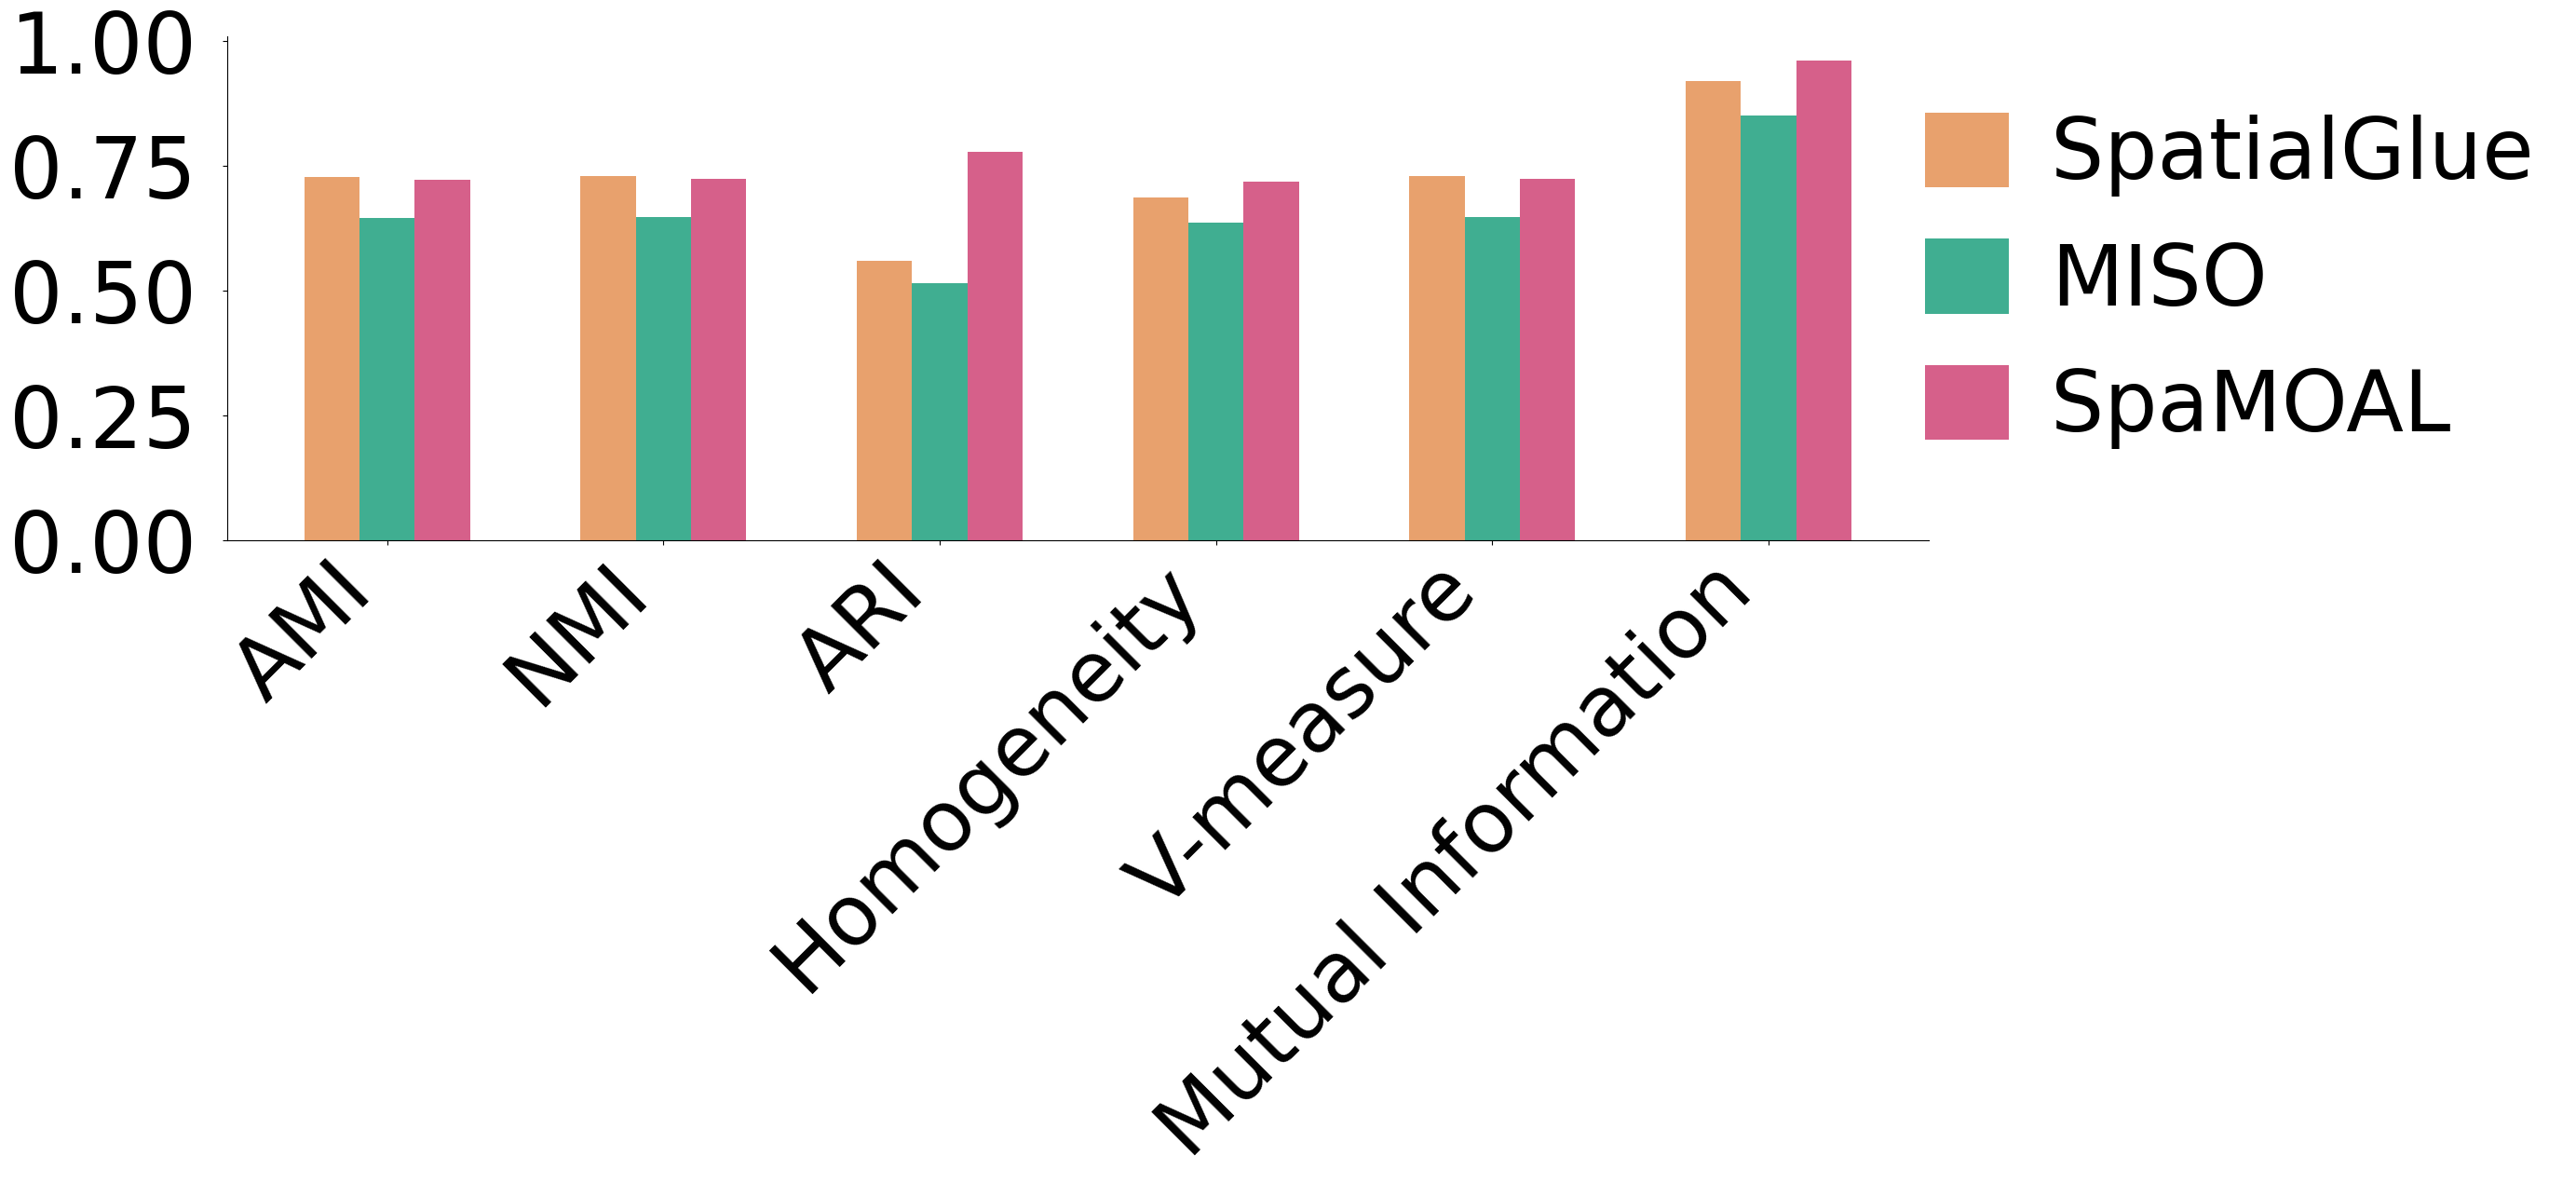

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue', 'MISO', 'SpaMOAL']
data = {
     'SpatialGlue': [0.7285, 0.7305, 0.5595, 0.6878, 0.7305, 0.9196],
    'MISO': [0.6458, 0.6483, 0.5159, 0.6363, 0.6483, 0.8508],
    'SpaMOAL': [0.7223, 0.7242, 0.7783, 0.7189, 0.7242, 0.9611],
}

# 设置图形大小
fig, ax = plt.subplots(figsize=(30, 13))
plt.rcParams['font.size'] = 18
# 设置条形宽度
bar_width = 0.2
index = np.arange(len(labels))

# 定义颜色列表
colors = ['#E8A16D', '#40AE91', '#D6608A']

# 绘制条形图，并指定颜色
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method, color=colors[i])

# 设置图例，调整标记为正方形
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=65, 
          frameon=False, handlelength=1, handleheight=1, handletextpad=0.5)
# 获取图例的字体属性
legend_text = legend.get_texts()[0]
legend_font = legend_text.get_fontproperties()

# 提取字体属性（不包括大小）
font_family = legend_font.get_family()

ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=65,family=font_family)

ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.yticks(fontsize=65)
ax.tick_params(axis='y', pad=20)

# 隐藏顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.tight_layout()
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim4/metrics_3.png', format='png')

plt.show()